<a href="https://colab.research.google.com/github/rileyseefeldt/MAT-422/blob/main/HW3_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#3.7 Neural Networks

##3.7.1 Mathematical Formulation

Key Terms:

Weights: Parameters that determine the strength/connection between nodes which indicate how much the input will influence the output.

Bias: An additional parameter that allows a neural network to shift the ouput independently of the weighted sum of variables.

A simple neural network with one layer is used to classify data based on input feature x1 and x2. By adjusting the weights and biases associated with each variable, the algorythm routes the input which is mostly likely the correct classification.

The forcast output y is determined by the activation function σ (z):

y = σ(z) = σ(w1 * a1 + w2 * a2 + b).

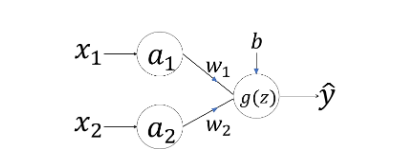


A general neural networks can contain hundreds of thousands of nodes and input units. As the algorythm processes these input variables, it recursively updates it's weights and biases to create more accurate predictions. After a sufficient amount of adjustments, the program can be terminated.

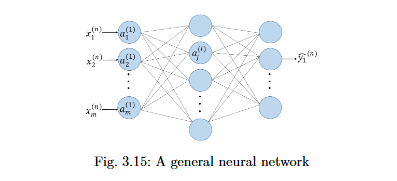

The mathematical formula for a neural network, with the matrix W(l) containing the multiplicative paramters is written as:

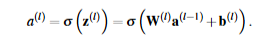

In [78]:
#simple neural network example

#computes the simple activation function
#takes inputs of inputs x1, x2, their resepctive weights, and a bias term
def z(x1,x2,w1,w2,b):
  z = (w1 * x1) + (w2 * x2) + b
  print("Input x1:", x1)
  print("Input x2:", x2)
  print("Weighted sum: ", z)
  outputRule(z)

#determnes output y depending on activation function
#simple rule if z>0 then y =1
def outputRule(z):
  if(z > 0):
    y = 1
  else:
    y = 0
  print("output y:", y)
  print("")

#By changing the inputs we get different weighted sums
#The algorythm decides what to select as the value of y depending on activation fucntion
z(1,1,0.3,0.7,0.1)
z(1,17,-5,0.0007,2)
z(3,-2,0.5,0.5,-10)

Input x1: 1
Input x2: 1
Weighted sum:  1.1
output y: 1

Input x1: 1
Input x2: 17
Weighted sum:  -2.9881
output y: 0

Input x1: 3
Input x2: -2
Weighted sum:  -9.5
output y: 0



##3.7.2 Activation Functions

The activation funciton used in the previous exmaple was a very simple mathematical model. However, there are multiple other activation functions which Neural Networks use.

Step Function:

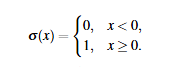

Used to represent a signal that switches on at a specified time and stays on.

ReLU Function:

σ(x) = max(0 , x).

Used to either pass through a signal untouched (if x>0) or kill it completely (if x<0)

Sigmoid function:

σ(x) = 1 / ( 1 + e^(-x))

Used in a large range of fields, but most often in probability models

Softmax Function:

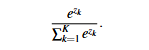

Converts a vector of numbers into a vector of probabilites where larger numbers correspond to larger probabilites in the ouput vector.

In [79]:
#Activation Function example
import numpy as np

x = 2.5
K = np.array([1,2,3,4,5,6,7,8,9,10])

#calculates the step function based off variable x
def step_function(x):
  if(x<0):
    return 0
  else:
    return 1

#calculates the reLU function based off variable x
def reLU_function(x):
  return max(0,x)

#calculates the sigmoid function based off variable x
def sigmoid_function(x):
  return 1 / (1 + np.exp(-x))

#calculates the softmax function based off vector K
def softmax_function(K):
  return np.exp(K) / np.sum(np.exp(K))

print("Input x:", x)
print("Step function output:", step_function(x))
print("reLU function output:", reLU_function(x))
print("Sigmoid function output:", sigmoid_function(x))
print("")
print("Vector K", K)
print("Softmax function output:")
print(softmax_function(K))

Input x: 2.5
Step function output: 1
reLU function output: 2.5
Sigmoid function output: 0.9241418199787566

Vector K [ 1  2  3  4  5  6  7  8  9 10]
Softmax function output:
[7.80134161e-05 2.12062451e-04 5.76445508e-04 1.56694135e-03
 4.25938820e-03 1.15782175e-02 3.14728583e-02 8.55520989e-02
 2.32554716e-01 6.32149258e-01]


##3.7.3 Cost Function

Generally, the cost function is used similarly to the least squares method. If we have a set of independent data yn and corresponding ouput data y_hat n. Then the Mean Squared Error cost function is:

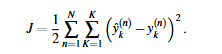


For classificaiton problems with only one output. The cost function is used in a similar manner to logistic regression. Let y(n) be the binary classification (0,1). Then the Binary Cross-Entropy cost function is:

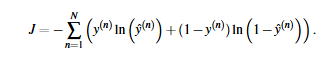


This is a standard choice for binary classifcation proglems because it provides a smooth gradient for optimization and penalizes incorect predictions.

In [80]:
#cost function example

#Mean Squared Error function
#Takes inputs of output value y_true and input y_pred to calculate error
def MSE_cost(y_pred, y_true):
  return np.mean((y_true - y_pred) ** 2) / 2

#Binary Cross Entropy cost function
#Takes inputs of output value y_true and input y_pred to calculate error
#inputs must be between 0 and 1
def BCE_cost(y_pred, y_true):
  #adding small epsolon to prevent divive by zero error
  y_pred = np.clip(y_pred, 1e-10, 1-  1e-10)
  return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

y_true = np.array([3.0, -0.5, 2.0, 7.0])
y_pred = np.array([2.5, 0.0, 2.0, 8.0])
print("Cost Function for Mean Squared Error", MSE_cost(y_pred,y_true))
print("")

y_true = np.array([1, 0, 1, 1, 0])
y_pred = np.array([0.9, 0.1, 0.8, 0.7, 0.3])
print("Cost Function for Binary Cross Entropy:", BCE_cost(y_pred,y_true))

Cost Function for Mean Squared Error 0.1875

Cost Function for Binary Cross Entropy: 0.22944289410146546


##3.7.4 Backpropagation

Backpropogation is the practice of recursively updating the weights of a nerual network based on the error rate of the previous iteration.

It does this by minimizing the cost function, J, with components W (weight) and b (bias). Using gradient descent, we take the parial derivatives of J with respect to W and bb. Specifically focusing on the layer l and not j' and node j and layer l-1.

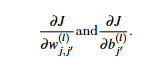

By simplification, we find

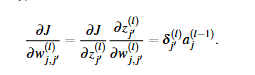

and

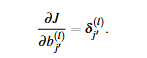



In [81]:
#Backpropogation key functions

#re definition of sigmoid funciton needed of backpropogation
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

#calculates derivative of sigmoid function with respect to x
def sigmoid_der(x):
  return sigmoid(x) * (1 - sigmoid(x))

#calculates derivative of cost function with respect to y_true for binary numbers
def cost_der(y_true,y_pred):
  return y_pred - y_true

#calculates the error term for each output using the cost and sigmoid derivative
def calc_error(y_true,y_pred,x):
  return cost_der(y_true, y_pred) * sigmoid_der(x)


#example data and results
y_true = np.array([1, 0, 1])
y_pred = np.array([0.9, 0.2, 0.8])
#where x represents the weighed sum of inputs plus bias term
x = np.array([2.2, -1.5, 1.8])

print("Predicted values:", y_pred)
print("True values:", y_true)
print("Sigmoid Derivative:", sigmoid_der(x))
print("Cost Derivative:", cost_der(y_true,y_pred))
print("Delta values:", calc_error(y_true,y_pred,x))

Predicted values: [0.9 0.2 0.8]
True values: [1 0 1]
Sigmoid Derivative: [0.08980033 0.14914645 0.12172934]
Cost Derivative: [-0.1  0.2 -0.2]
Delta values: [-0.00898003  0.02982929 -0.02434587]


##3.7.5 Backpropagation Algorithm

The backpropogation algorythm involves:

1. Initializing the weights and biases, typically at random
2. Picking input data and input the vector x into the left side of the network
3. calculate all variables associated with input (z, a etc).
4. Update parameters by scholastic gradient descent
5. Repeat process until desired accuracy is reached.

In [82]:
#Backpropogation algorythm for simple binary dataset
#step 1: initializing the weights and biases at rabdon
weights = np.random.rand(2)
bias = np.random.rand(1)
learning_rate = 0.5
#0.3 margin of error for results
#works for smaller numbers, but code execution will be longer
desired_accuracy = 0.3

#training data for the AI model
#each input X has a label associated with it.
#works like an "OR gate"
#Algroythm should learn to classify new data according to this model
X = np.array([[0,1],[1,0],[1,1],[0,0]])
labels = np.array([1,1,1,0])

for j in range(100000): #max iterations in case code doesn't find a solution
  cost = 0
  for i in range(len(X)):
    #Step 2: inputting input data into network
    x = X[i]
    y = labels[i]

    #Step 3: Calculate variables associated with input
    z = np.dot(weights, x) + bias
    a = sigmoid(z)
    error = calc_error(y,a,z)

    #Step 4: Update parameters by gradient decsent
    weights -= learning_rate * error * x
    bias -= learning_rate * error

    #Step 5: repeat until desired accuracy is reached
    #Calulating binary cross entropy function
    cost += BCE_cost(y,a)

  #calculates average cost
  avg_cost = cost/len(X)
  if(j%1000 == 0):
    print("Avg Cost (error)", avg_cost, "reached")
  #checks if accuracy is reached
  if(avg_cost <= desired_accuracy):
    print("Desired accuracy of", desired_accuracy, "reached")
    break;

print("Final weights:", weights)
print("Final bias:", bias)

#makes predictions with trained model
def predict(x, weights, bias):
    z = np.dot(weights, x) + bias  # Calculate the weighted sum
    a = sigmoid(z)  #calculates a probability
    if (a>=0.5):
      return 1
    else:
      return 0

x_test = np.array([[0, 0], [0, 1], [1, 0], [1, 1],[0.1,0.1],[-0.1,-0.1]])
print("")
print("Testing new data on trained model")
for i in x_test:
  print("Input:", i, "Predicted result", predict(i,weights,bias))

Avg Cost (error) 9.269009761191175 reached
Avg Cost (error) 1.0419636903593474 reached
Avg Cost (error) 0.711355450222634 reached
Avg Cost (error) 0.5715729311929592 reached
Avg Cost (error) 0.4902459444676952 reached
Avg Cost (error) 0.4356053154780186 reached
Avg Cost (error) 0.39571778491600174 reached
Avg Cost (error) 0.3649783204658471 reached
Avg Cost (error) 0.34036563450511936 reached
Avg Cost (error) 0.3200902055521312 reached
Avg Cost (error) 0.30301651982051353 reached
Desired accuracy of 0.3 reached
Final weights: [7.96367393 7.96387997]
Final bias: [-3.74607409]

Testing new data on trained model
Input: [0. 0.] Predicted result 0
Input: [0. 1.] Predicted result 1
Input: [1. 0.] Predicted result 1
Input: [1. 1.] Predicted result 1
Input: [0.1 0.1] Predicted result 0
Input: [-0.1 -0.1] Predicted result 0


Neural Network is able to classify binary data according to an "OR-Gate"